In [4]:
# https://stackoverflow.com/questions/38781245/bad-result-plotting-windowing-fft

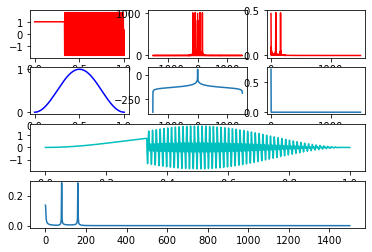

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math

sign_freq=80
sample_freq=3000
num=np.linspace(0,1,num=sample_freq)
i=0
#wave data:
sin=np.sin(2*pi*num*sign_freq)+np.sin(2*pi*num*sign_freq*2)
while i<1000:
    sin[i]=1
    i=i+1


#wave fft:
fft_sin=np.fft.fft(sin) 
fft_freq_axis=np.fft.fftfreq(len(num),d=1/sample_freq)

#wave Linear Spectrum (Rms)
lin_spec=math.sqrt(2)*np.abs(np.fft.rfft(sin))/len(num)
lin_spec_freq_axis=np.fft.rfftfreq(len(num),d=1/sample_freq)

#window data:
hann=np.hanning(len(num))

#window fft:
fft_hann=np.fft.fft(hann) 

#window fft Linear Spectrum:
wlin_spec=math.sqrt(2)*np.abs(np.fft.rfft(hann))/len(num)

#window + sin
wsin=hann*sin

#window + sin fft:
wsin_spec=math.sqrt(2)*np.abs(np.fft.rfft(wsin))/len(num)
wsin_spec_freq_axis=np.fft.rfftfreq(len(num),d=1/sample_freq)

fig=plt.figure()
ax1 = fig.add_subplot(431)
ax2 = fig.add_subplot(432)
ax3 = fig.add_subplot(433)
ax4 = fig.add_subplot(434)
ax5 = fig.add_subplot(435)
ax6 = fig.add_subplot(436)
ax7 = fig.add_subplot(413)
ax8 = fig.add_subplot(414)

ax1.plot(num,sin,'r')
ax2.plot(fft_freq_axis,abs(fft_sin),'r')
ax3.plot(lin_spec_freq_axis,lin_spec,'r')
ax4.plot(num,hann,'b')
ax5.plot(np.fft.fftshift(fft_freq_axis),np.fft.fftshift(20*np.log10(abs(fft_hann))))
ax6.plot(lin_spec_freq_axis,wlin_spec)
ax7.plot(num,wsin,'c')
ax8.plot(wsin_spec_freq_axis,wsin_spec)

plt.show()